In [ ]:
#!pip install pmdarima

In [4]:
#import lightgbm as lgb
import numpy as np
import pandas as pd

#from fbprophet import Prophet
from matplotlib import pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

myfavouritenumber = 13
seed = myfavouritenumber
np.random.seed(seed)

In [5]:
df = pd.read_csv("ARIMAXdata.csv")
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


<AxesSubplot:xlabel='Date'>

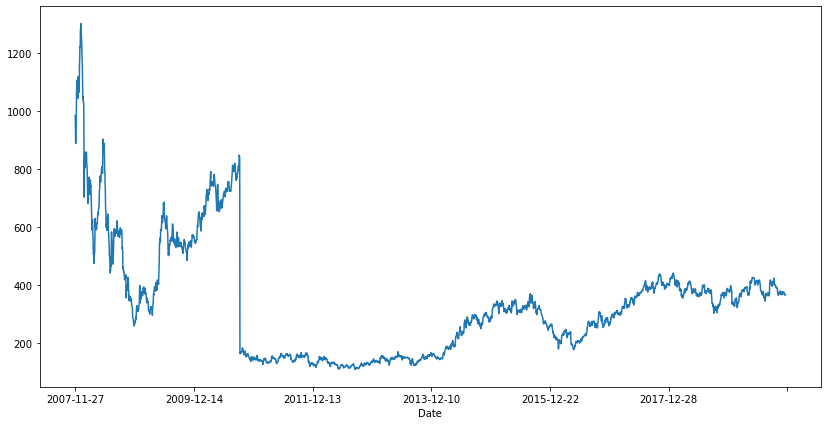

In [6]:
df.VWAP.plot(figsize=(14, 7))

In [7]:
df.reset_index(drop=True, inplace=True)
lag_features = ["High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,...,7.645387e+13,3.049390e+13,3.858696e+13,5.282231e+13,37578.894531,37554.21875,37369.265625,12433.710938,14776.610352,18039.277344
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,...,2.687719e+15,3.049390e+13,3.858696e+13,5.282231e+13,37578.894531,37554.21875,37369.265625,12433.710938,14776.610352,18039.277344
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,...,1.559498e+15,1.595546e+15,1.595546e+15,1.595546e+15,37578.894531,37554.21875,37369.265625,12433.710938,14776.610352,18039.277344
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,...,1.191354e+15,1.295945e+15,1.295945e+15,1.295945e+15,37578.894531,37554.21875,37369.265625,12433.710938,14776.610352,18039.277344
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,...,1.000597e+15,1.466104e+13,1.124812e+15,1.124812e+15,37578.894531,37554.21875,37369.265625,12433.710938,14776.610352,18039.277344


In [9]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.isocalendar().week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,...,37578.894531,37554.21875,37369.265625,12433.710938,14776.610352,18039.277344,11,48,27,1
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,...,37578.894531,37554.21875,37369.265625,12433.710938,14776.610352,18039.277344,11,48,28,2
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,...,37578.894531,37554.21875,37369.265625,12433.710938,14776.610352,18039.277344,11,48,29,3
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,...,37578.894531,37554.21875,37369.265625,12433.710938,14776.610352,18039.277344,11,48,30,4
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,...,37578.894531,37554.21875,37369.265625,12433.710938,14776.610352,18039.277344,12,49,3,0


In [10]:
df_train = df[df.Date < "2019"]
df_valid = df[df.Date >= "2019"]

exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3", "Trades_mean_lag3", "Trades_std_lag3",
                      "High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7", "Trades_mean_lag7", "Trades_std_lag7",
                      "High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Turnover_std_lag30", "Trades_mean_lag30", "Trades_std_lag30",
                      "month", "week", "day", "day_of_week"]

In [13]:
df_train[exogenous_features]

,High_mean_lag3,High_std_lag3,Low_mean_lag3,Low_std_lag3,Volume_mean_lag3,Volume_std_lag3,Turnover_mean_lag3,Turnover_std_lag3,Trades_mean_lag3,Trades_std_lag3,...,Volume_mean_lag30,Volume_std_lag30,Turnover_mean_lag30,Turnover_std_lag30,Trades_mean_lag30,Trades_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,343.002411,6.025938,329.091431,6.253471,2422307.00,9.930849e+05,7.400702e+13,3.049390e+13,37578.894531,12433.710938,...,2435383.00,1.610808e+06,7.645387e+13,5.282231e+13,37369.265625,18039.277344,11,48,27,1
2007-11-28,1050.000000,6.025938,770.000000,6.253471,27294366.00,9.930849e+05,2.687719e+15,3.049390e+13,37578.894531,12433.710938,...,27294366.00,1.610808e+06,2.687719e+15,5.282231e+13,37369.265625,18039.277344,11,48,28,2
2007-11-29,1020.000000,42.426407,822.000000,73.539108,15937852.00,1.606054e+07,1.559498e+15,1.595546e+15,37578.894531,12433.710938,...,15937852.00,1.606054e+07,1.559498e+15,1.595546e+15,37369.265625,18039.277344,11,48,29,3
2007-11-30,984.916687,67.768143,828.333313,53.144459,12333275.00,1.295953e+07,1.191354e+15,1.295945e+15,37578.894531,12433.710938,...,12333275.00,1.295953e+07,1.191354e+15,1.295945e+15,37369.265625,18039.277344,11,48,30,4
2007-12-03,954.250000,37.764896,868.333313,24.986664,4771740.50,3.055014e+05,4.382227e+14,1.466104e+13,37578.894531,12433.710938,...,10402397.00,1.126408e+07,1.000597e+15,1.124812e+15,37369.265625,18039.277344,12,49,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,377.899994,1.408013,366.716675,6.722413,5087678.50,5.073957e+06,1.868037e+14,1.838924e+14,54513.332031,41245.519531,...,3818546.25,1.816357e+06,1.378313e+14,6.628512e+13,46878.167969,17314.830078,12,52,24,0
2018-12-26,374.366669,6.727989,362.149994,5.947478,5308231.50,4.856752e+06,1.940851e+14,1.766703e+14,59203.000000,36133.746094,...,3776740.25,1.837702e+06,1.366462e+14,6.697153e+13,45890.933594,17065.187500,12,52,26,2
2018-12-27,374.916656,7.090193,358.316681,0.825126,5899123.50,4.482645e+06,2.155021e+14,1.633832e+14,61337.000000,34682.324219,...,3808251.00,1.842200e+06,1.382175e+14,6.710719e+13,46115.601562,17038.511719,12,52,27,3


In [17]:
model = auto_arima(df_train.VWAP.values, exogenous=df_train[exogenous_features].values, trace=True, error_action="trace", suppress_warnings=False)
model.fit(df_train.VWAP.values, exogenous=df_train[exogenous_features].values)

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=25056.965, Time=5.53 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=25293.348, Time=3.79 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=25101.529, Time=3.90 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=25075.823, Time=4.87 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=44304.784, Time=3.63 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=25066.073, Time=5.31 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=25047.376, Time=5.10 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=25062.481, Time=5.00 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=25052.012, Time=5.00 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=25053.129, Time=5.54 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=25046.053, Time=5.27 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=25050.688, Time=5.72 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=25054.063, Time=5.88 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=25043.789, Time=5.11 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=25049.811, Time=4.82 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,0,0)(0,0,0)[0]             : AIC=25048.351, Time=5.55 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=25050.911, Time=5.31 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=25045.007, Time=5.04 sec


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=25051.797, Time=5.92 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 96.322 seconds


C:\Users\admin45\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-17-4073eddf00ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["Forecast_ARIMAX"] = forecast


<AxesSubplot:xlabel='Date'>

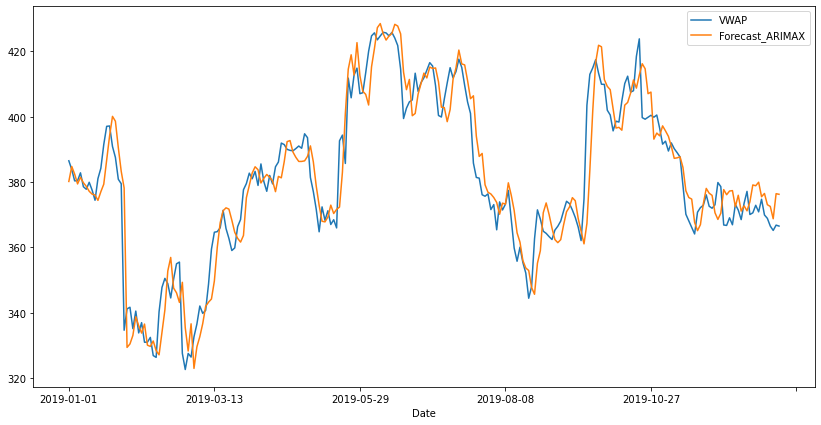

In [18]:
df_valid[["VWAP", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [19]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 8.382410585581843

MAE of Auto ARIMAX: 6.243880229414188
